# Projeto: SmartBackorder: Análise e Predição de BackOrders de Produtos

#### Etapa 01: Conhecer, Preparar e Limpar os Dados (análise preliminar de Features)
- BackOrders_Etapa01_Cleaning-Data-Train.ipynb
- BackOrders_Etapa01_Cleaning-Data-Test.ipynb

#### Etapa 02: Análise mais detalhada de Features
- BackOrders_Etapa02_EDA-Trend-Analysis-Train.ipynb
- BackOrders_Etapa02_EDA-Trend-Analysis-Test.ipynb

#### Etapa 03: Geração de Modelos e Avaliação dos Resultados
- BackOrders_Etapa03_Model-Fit-Validation.ipynb

#### Etapa 04: Tuning/Calibração de Modelos e Reavaliação dos Resultados
- BackOrders_Etapa04_TuningGradientBoostingModel.ipynb

### Etapa 02: Análise mais detalhada de Features

Etapa 2 - Objetivos:
- Relacionamento entre as Features
- Análise de Tendências
- Questionamento sobre os dados

### Observação sobre a Etapa 02:
#### Exploratory Data Analysis (EDA) / Análise Exploratória de Dados (AED)
- https://en.wikipedia.org/wiki/Exploratory_data_analysis
- https://pt.wikipedia.org/wiki/An%C3%A1lise_explorat%C3%B3ria_de_dados

"Em estatística, a análise exploratória de dados (AED) é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais. 

Um modelo estatístico pode ou não ser usado, mas primariamente a AED tem como objetivo observar o que os dados podem nos dizer além da modelagem formal ou do processo de teste de hipóteses. (Wikipédia - vide links acima)"


Nesta Etapa 03 faremos alguns exercícios de análise exploratória, mais com o objetivo didático do que especificamente "dissecar" o Dataset. 

Tal proposta se justifica basicamente por dois motivos:

1. Ausência de domínio das inúmeras técnicas estatísticas que poderiam ser utilizadas;
2. Ausência de um conhecimento mais aprofundado na área de negócio, que seria suprida pela presença do Analista de Negócios Especialista, em uma equipe multidisciplinar.

# Conteúdo do Dataset
#### (relembrando). 

As colunas são definidas da seguinte forma:
- sku - Random ID for the product (chave de identificação de produto)
- national_inv - Current inventory level for the part (estoque atual)
- lead_time - Transit time for product (if available) (tempo de tranporte do fornecedor)
- in_transit_qty - Amount of product in transit from source (quantidade em transporte no momento)
- forecast_3_month - Forecast sales for the next 3 months (previsão de vendas - próximos 3 meses)
- forecast_6_month - Forecast sales for the next 6 months (previsão de vendas - próximos 6 meses)
- forecast_9_month - Forecast sales for the next 9 months (previsão de vendas - próximos 9 meses)
- sales_1_month - Sales quantity for the prior 1 month time period (quantidade vendida - último mês)
- sales_3_month - Sales quantity for the prior 3 month time period (quantidade vendida - últimos 3 meses)
- sales_6_month - Sales quantity for the prior 6 month time period (quantidade vendida - últimos 6 meses)
- sales_9_month - Sales quantity for the prior 9 month time period (quantidade vendida - últimos 6 meses)
- min_bank - Minimum recommend amount to stock (quantidade de estoque mínima recomendada)
- potential_issue - Source issue for part identified (problema de origem para parte identificada)
- pieces_past_due - Parts overdue from source (partes atrasadas da fonte)
- perf_6_month_avg - Source performance for prior 6 month period (desempenho da fonte para o período anterior de 6 meses)
- perf_12_month_avg - Source performance for prior 12 month period (desempenho da fonte para o período anterior de 12 meses)
- local_bo_qty - Amount of stock orders overdue (quantidade de pedidos atrasados)
- deck_risk - Part risk flag (indicativo de risco)
- oe_constraint - Part risk flag (indicativo de risco)
- ppap_risk - Part risk flag (indicativo de risco)
- stop_auto_buy - Part risk flag (indicativo de risco)
- rev_stop - Part risk flag (indicativo de risco)
- went_on_backorder - Product actually went on backorder. This is the target value. (o produto realmente entrou em ordem. Este é o valor alvo.)

In [1]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#...the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
#http://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

In [2]:
#carregando datasets
# treino
df = pd.read_csv('data/Backorder_Treino_clean.csv')
# teste
#df = pd.read_csv('data/Backorder_Teste_clean.csv')
data_frame = df
data_frame.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.782381,0.776976,0.0,0,0,0,1,0,0
1,1043384,1.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.990000,0.990000,0.0,0,0,0,1,0,0
2,1043696,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.782381,0.776976,0.0,1,0,0,1,0,0
3,1043852,0.989949,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.100000,0.130000,0.0,0,0,0,1,0,0
4,1044048,0.872872,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.782381,0.776976,0.0,1,0,0,1,0,0


In [3]:
data_frame.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,1407754,0.000000,2.0,0.000000,0.472456,0.472456,0.472456,0.00000,0.236228,0.330719,...,0.0,0.690000,0.690000,0.236228,1,0,0,1,0,0
1687856,1373987,-0.064550,8.0,0.000000,0.322749,0.451848,0.580948,0.06455,0.193649,0.193649,...,0.0,0.782381,0.776976,0.064550,0,0,0,1,0,0
1687857,1524346,-0.041451,9.0,0.000000,0.290159,0.373062,0.455965,0.00000,0.331611,0.455965,...,0.0,0.860000,0.840000,0.041451,1,0,0,0,0,1
1687858,1439563,0.196185,9.0,0.050628,0.123407,0.275292,0.398698,0.11075,0.199349,0.484134,...,0.0,0.860000,0.840000,0.018986,0,0,0,1,0,0
1687859,1502009,0.613222,4.0,0.000000,0.000000,0.000000,0.000000,0.06455,0.225924,0.387298,...,0.0,0.730000,0.780000,0.032275,0,0,0,1,0,0


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
sku                  1687860 non-null int64
national_inv         1687860 non-null float64
lead_time            1687860 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null int64
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null int64
oe_constraint        1687860 non-null int64
ppap_risk            

### Nota: Ao salvar o Dataset ("clean") os campos com as informações de valores foram convertidos de Int para Float.
- "national_inv", "perf_6_month_avg" e "perf_12_month_avg" foram preenchidas na etapa 01. As demais Features não.
- pendência sobre essa mudança nos tipos de dados: verificar, entender e corrigir (se for o caso).

In [5]:
# "sku" (stock keeping unit) é a chave de identificação de produto.
data_frame = data_frame.set_index('sku')
data_frame.tail()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1407754,0.000000,2.0,0.000000,0.472456,0.472456,0.472456,0.00000,0.236228,0.330719,0.330719,...,0.0,0.690000,0.690000,0.236228,1,0,0,1,0,0
1373987,-0.064550,8.0,0.000000,0.322749,0.451848,0.580948,0.06455,0.193649,0.193649,0.516398,...,0.0,0.782381,0.776976,0.064550,0,0,0,1,0,0
1524346,-0.041451,9.0,0.000000,0.290159,0.373062,0.455965,0.00000,0.331611,0.455965,0.497416,...,0.0,0.860000,0.840000,0.041451,1,0,0,0,0,1
1439563,0.196185,9.0,0.050628,0.123407,0.275292,0.398698,0.11075,0.199349,0.484134,0.648676,...,0.0,0.860000,0.840000,0.018986,0,0,0,1,0,0
1502009,0.613222,4.0,0.000000,0.000000,0.000000,0.000000,0.06455,0.225924,0.387298,0.645497,...,0.0,0.730000,0.780000,0.032275,0,0,0,1,0,0


### Analisando Features e Tendências

In [6]:
# Analisando correlações (relembrando)
col_corr = data_frame.corr()
col_corr

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
national_inv,1.000000,0.126145,-0.205863,-0.649153,-0.766976,-0.792768,-0.391577,-0.562456,-0.602166,-0.593090,...,-0.094317,-0.055803,-0.051327,-0.092183,0.153261,-0.012017,-0.004565,-0.013291,-0.027926,-0.116755
lead_time,0.126145,1.000000,-0.044460,-0.108339,-0.137893,-0.141335,-0.063749,-0.077344,-0.069875,-0.055812,...,-0.014294,-0.009766,-0.007482,-0.000241,0.134983,-0.003095,0.010739,-0.240950,0.001077,-0.018104
in_transit_qty,-0.205863,-0.044460,1.000000,0.044296,0.081435,0.093835,0.056250,0.099251,0.099237,0.085906,...,0.020409,-0.021008,-0.021349,0.024315,0.050810,0.003619,-0.017007,0.019993,-0.000089,-0.012771
forecast_3_month,-0.649153,-0.108339,0.044296,1.000000,0.857958,0.744180,0.122850,0.177143,0.150135,0.132130,...,0.151020,-0.057898,-0.061277,0.082791,0.038408,0.012169,0.031090,0.012175,-0.006353,0.112227
forecast_6_month,-0.766976,-0.137893,0.081435,0.857958,1.000000,0.924864,0.210867,0.325319,0.317494,0.299976,...,0.118253,0.012989,0.009344,0.062855,-0.056497,0.008877,0.008446,0.041241,-0.010572,0.106501
forecast_9_month,-0.792768,-0.141335,0.093835,0.744180,0.924864,1.000000,0.263736,0.422333,0.432965,0.414404,...,0.092159,0.057023,0.052897,0.050256,-0.134308,0.007348,-0.009490,0.058195,-0.012633,0.096495
sales_1_month,-0.391577,-0.063749,0.056250,0.122850,0.210867,0.263736,1.000000,0.699951,0.579393,0.529053,...,-0.004923,0.078676,0.074299,0.071945,-0.120452,0.005716,-0.028439,0.014466,-0.006629,0.071035
sales_3_month,-0.562456,-0.077344,0.099251,0.177143,0.325319,0.422333,0.699951,1.000000,0.844880,0.775227,...,-0.001690,0.115582,0.110913,0.064234,-0.195200,0.007786,-0.042763,0.016244,-0.005769,0.068514
sales_6_month,-0.602166,-0.069875,0.099237,0.150135,0.317494,0.432965,0.579393,0.844880,1.000000,0.924348,...,-0.004519,0.131789,0.128035,0.041998,-0.241745,0.009805,-0.049468,0.014690,-0.002413,0.052212
sales_9_month,-0.593090,-0.055812,0.085906,0.132130,0.299976,0.414404,0.529053,0.775227,0.924348,1.000000,...,-0.009096,0.138311,0.134494,0.029386,-0.266550,0.010302,-0.052598,0.011687,-0.004062,0.043420


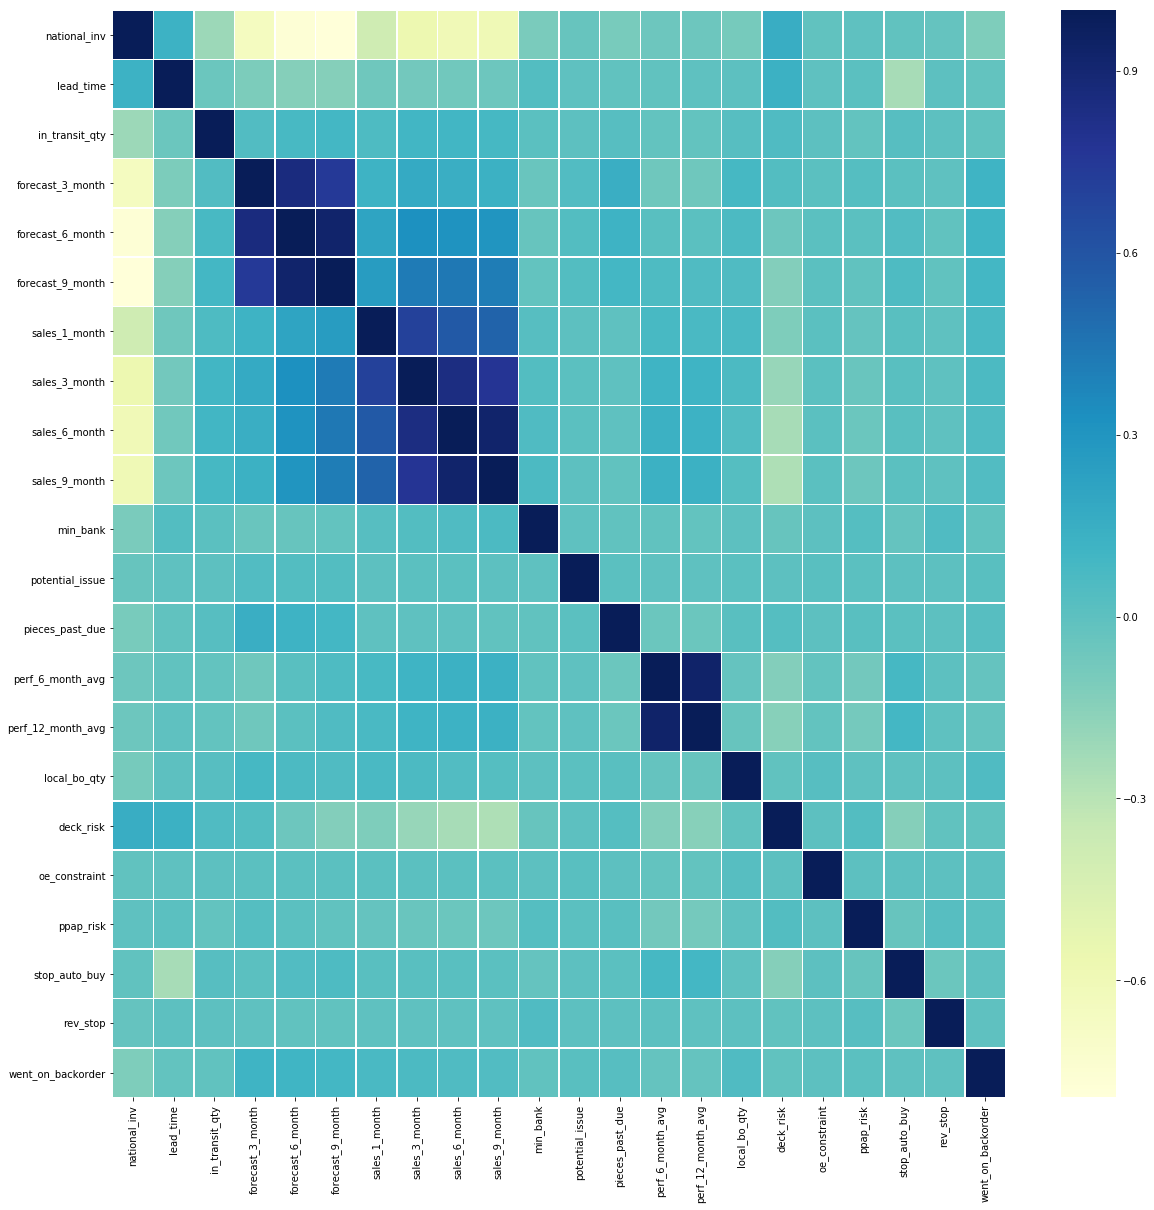

In [7]:
# Analisando correlações (relembrando)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(col_corr, annot=False, linewidths=.5, cmap="YlGnBu")

### Nota: Sobre o HeatMap acima, as Features muito correlacionadas terão notas altas em Features_Importance ao final ?

In [8]:
# Analisando: "perf_6_month_avg"' e "perf_12_month_avg"

perf_correlation_dataframe = data_frame[['perf_6_month_avg','perf_12_month_avg']]
perf_correlation = perf_correlation_dataframe.corr()
perf_correlation

,perf_6_month_avg,perf_12_month_avg
perf_6_month_avg,1.000000,0.931431
perf_12_month_avg,0.931431,1.000000


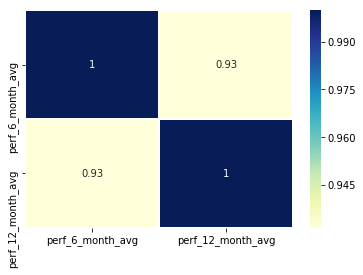

In [9]:
# Analisando: "perf_6_month_avg" e "perf_12_month_avg"

sns.heatmap(perf_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

/home/joaoluiz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/joaoluiz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


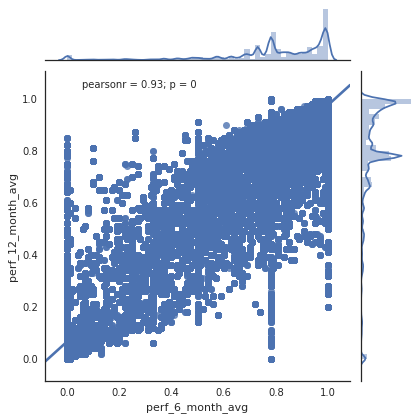

In [10]:
# Analisando: "perf_6_month_avg" e "perf_12_month_avg"

# https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.set(style="white", color_codes=True)
sns.jointplot('perf_6_month_avg', 'perf_12_month_avg', data=data_frame, kind='reg')

### Nota: "perf_6_month_avg" e "perf_12_month_avg" - Features muito relacionadas.

In [11]:
# Analisando: "sales_1_month", "sales_3_month", "sales_6_month" e "sales_9_month"

sales_correlation_dataframe = data_frame[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']]
sales_correlation = sales_correlation_dataframe.corr()
sales_correlation

,sales_1_month,sales_3_month,sales_6_month,sales_9_month
sales_1_month,1.000000,0.699951,0.579393,0.529053
sales_3_month,0.699951,1.000000,0.844880,0.775227
sales_6_month,0.579393,0.844880,1.000000,0.924348
sales_9_month,0.529053,0.775227,0.924348,1.000000


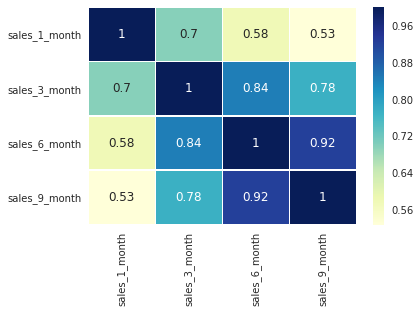

In [12]:
# Analisando: "sales_1_month", "sales_3_month", "sales_6_month" e "sales_9_month"

sns.heatmap(sales_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

### Nota: "sales_3_month", "sales_6_month" e "sales_9_month" apresentam forte correlação, diferentemente de "sales_1_month".

In [13]:
# Analisando: "forecast_3_month", "forecast_6_month" e "forecast_9_month"

forecast_correlation_dataframe = data_frame[['forecast_3_month','forecast_6_month','forecast_9_month']]
forecast_correlation = forecast_correlation_dataframe.corr()
forecast_correlation

,forecast_3_month,forecast_6_month,forecast_9_month
forecast_3_month,1.000000,0.857958,0.744180
forecast_6_month,0.857958,1.000000,0.924864
forecast_9_month,0.744180,0.924864,1.000000


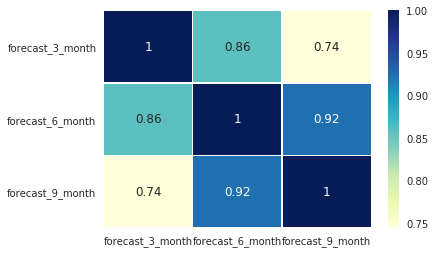

In [14]:
# Analisando: "forecast_3_month", "forecast_6_month" e "forecast_9_month"

sns.heatmap(forecast_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

### Nota: "forecast_3_month", "forecast_6_month" e "forecast_9_month" apresentam forte correlação.

(array([4.96755e+05, 9.26494e+05, 2.20325e+05, 1.32710e+04, 3.18000e+02,
        5.01000e+02, 3.50000e+01, 4.80000e+01, 0.00000e+00, 3.01130e+04]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

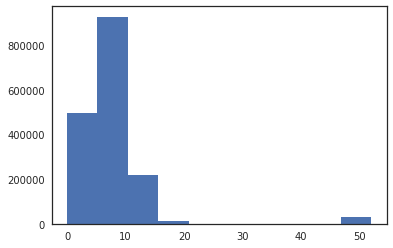

In [15]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor)

plt.hist(data_frame.lead_time)

### Nota: quase a totalitade dos produtos tem um tempo de entrega entre 1 e 15 dias por parte do fornecedor.

(array([5.30000e+01, 8.00000e+00, 1.40000e+01, 4.05000e+02, 5.40800e+03,
        3.73686e+05, 2.11169e+05, 1.24664e+05, 1.15619e+05, 8.56834e+05]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

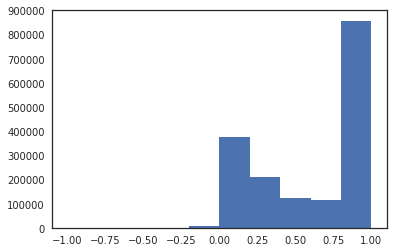

In [16]:
# Analisando: "national_inv" (estoque atual)

plt.hist(data_frame.national_inv)

(array([1435947.,  144482.,   39020.,   24378.,   19462.,    6310.,
           2130.,    8783.,    2294.,    5054.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

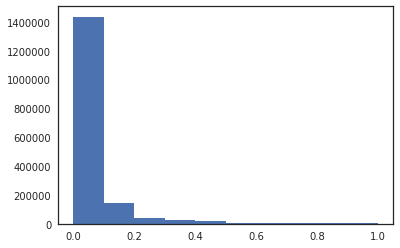

In [17]:
# Analisando: "min_bank" (quantidade de estoque mínima recomendada)

plt.hist(data_frame.min_bank)

In [18]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "national_inv" (estoque atual)

lead_time_national_inv_dataframe = data_frame[['lead_time','national_inv']]
lead_time_national_inv_correlation = lead_time_national_inv_dataframe.corr()
lead_time_national_inv_correlation

,lead_time,national_inv
lead_time,1.000000,0.126145
national_inv,0.126145,1.000000


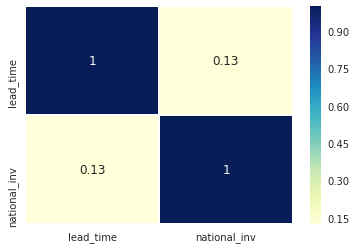

In [19]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "national_inv" (estoque atual)

sns.heatmap(lead_time_national_inv_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

Text(0,0.5,'estoque atual')

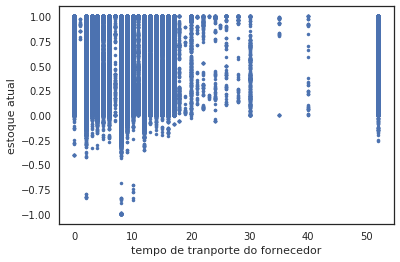

In [20]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "national_inv" (estoque atual)

plt.plot(data_frame.lead_time, data_frame.national_inv, marker='.', linestyle='None')
plt.xlabel('tempo de tranporte do fornecedor')
plt.ylabel('estoque atual')

In [21]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "min_bank" (quantidade de estoque mínima recomendada)

lead_time_min_bank_dataframe = data_frame[['lead_time','min_bank']]
lead_time_min_bank_correlation = lead_time_min_bank_dataframe.corr()
lead_time_min_bank_correlation

,lead_time,min_bank
lead_time,1.000000,0.037845
min_bank,0.037845,1.000000


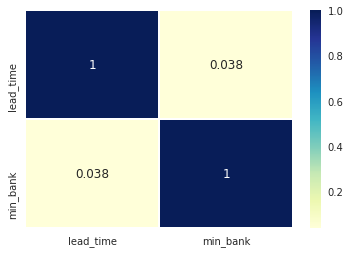

In [22]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "min_bank" (quantidade de estoque mínima recomendada)

sns.heatmap(lead_time_min_bank_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

Text(0,0.5,'quantidade de estoque mínima recomendada')

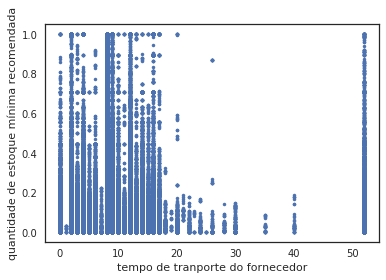

In [23]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "min_bank" (quantidade de estoque mínima recomendada)

plt.plot(data_frame.lead_time, data_frame.min_bank, marker='.', linestyle='None')
plt.xlabel('tempo de tranporte do fornecedor')
plt.ylabel('quantidade de estoque mínima recomendada')

Text(0,0.5,'Quantidade de Estoque Mínima Recomendada')

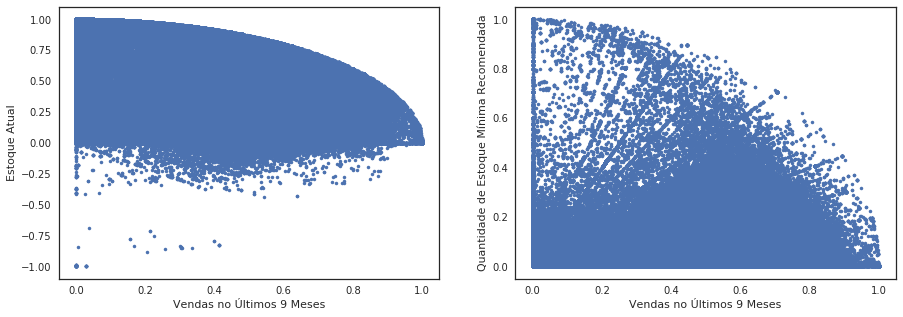

In [24]:
# Analisando: "sales_9_month" (Vendas no Últimos 9 Meses) versus "national_inv" (Estoque Atual)
# Analisando: "sales_9_month" (Vendas no Últimos 9 Meses) versus "min_bank" (quantidade de estoque mínima recomendada)

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
fig , ax = plt.subplots(ncols=2, figsize=(15,5))

plt.subplot(121)
plt.plot(data_frame.sales_9_month, df.national_inv, marker='.', linestyle='None')
plt.xlabel('Vendas no Últimos 9 Meses')
plt.ylabel('Estoque Atual')

plt.subplot(122)
plt.plot(data_frame.sales_9_month, df.min_bank, marker='.', linestyle='None')
plt.xlabel('Vendas no Últimos 9 Meses')
plt.ylabel('Quantidade de Estoque Mínima Recomendada')

#### Analisando: "Part risk flag" versus "went_on_backorder"

- deck_risk - Part risk flag (indicativo de risco)
- oe_constraint - Part risk flag (indicativo de risco)
- ppap_risk - Part risk flag (indicativo de risco)
- stop_auto_buy - Part risk flag (indicativo de risco)
- rev_stop - Part risk flag (indicativo de risco)

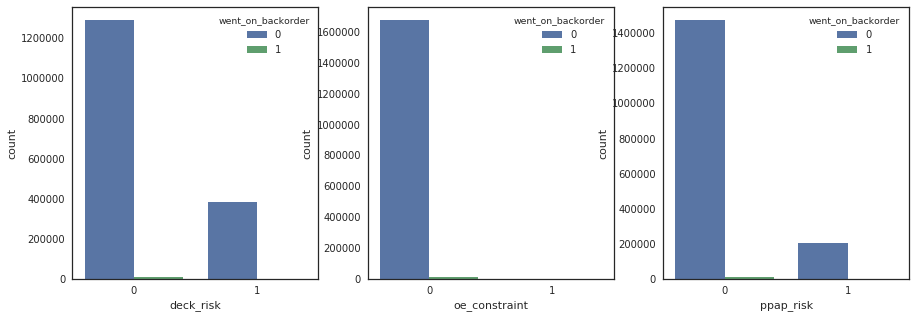

In [25]:
# Analisando: "Part risk flag" versus "went_on_backorder"

# https://seaborn.pydata.org/generated/seaborn.countplot.html

fig , ax = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot('deck_risk', hue='went_on_backorder', data=data_frame, ax=ax[0])
sns.countplot('oe_constraint',hue='went_on_backorder', data=data_frame, ax=ax[1])
sns.countplot('ppap_risk', hue='went_on_backorder', data=data_frame, ax=ax[2])

#### Nota: Existe uma relação entre "deck_risk" e "ppap_risk" com "went_on_backorder" (Target). Deverá ser melhor estudada.

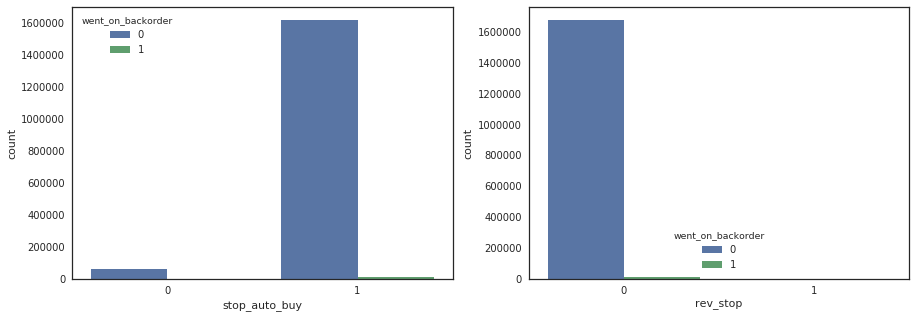

In [26]:
# Analisando: "Part risk flag" versus "went_on_backorder"

# https://seaborn.pydata.org/generated/seaborn.countplot.html

fig , ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot('stop_auto_buy',hue='went_on_backorder', data=data_frame, ax=ax[0])
sns.countplot('rev_stop',hue='went_on_backorder', data=data_frame, ax=ax[1])

#### Nota: Embora relativamente discreta, existe uma relação entre "ligar ou desligar" a Feature "stop_auto_buy" (paralisar compra automática?) e  "went_on_backorder" (Target). 
- Paralisar Compra Automática ("stop_auto_buy" = 1 (SIM)) => Gera BackOrder
- Ligar Compra Automática ("stop_auto_buy"  = 0 (NÃO)) => Não gera BackOrder

### Fim -> "Etapa 02: Análise mais detalhada de Features"
#### Exploratory Data Analysis (EDA) / Análise Exploratória de Dados (AED)